In [ ]:
import pandas as pd
df = pd.read_csv("/content/mitbih_train.csv")

In [ ]:
df.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
df.iloc[:,187]

,0.000000000000000000e+00.88
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87548,4.0
87549,4.0
87550,4.0
87551,4.0


In [ ]:
df.iloc[:,187].reset_index()["0.000000000000000000e+00.88"].value_counts()

,count
0.000000000000000000e+00.88,
0.0,72470
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [ ]:
equilibre=df.iloc[:,187].reset_index()["0.000000000000000000e+00.88"].value_counts().values

In [ ]:
import plotly.express as px

labels = ['Normal', 'QRS', 'Ventricular', 'Supraventricular', 'Fusion']


fig = px.pie(
    names=labels,
    values=equilibre,
    title="ECG Class Distribution",
    hole=0.5,
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
df_2= df.copy()

In [ ]:
df.shape

(87553, 188)


Balanced Class Distribution:
 label
0.0    72470
4.0    72470
3.0    72470
1.0    72470
2.0    72470
Name: count, dtype: int64


<ipython-input-78-b68a38a485f8>:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




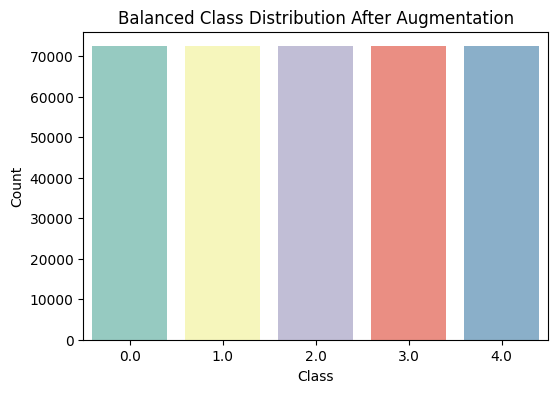

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values


original_dist = pd.Series(labels).value_counts().sort_index()

def jitter(x, sigma=0.05):
    return x + np.random.normal(loc=0., scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    scaling_factor = np.random.normal(loc=1.0, scale=sigma, size=(x.shape[0], 1))
    return x * scaling_factor


target_class_size = int(original_dist.max())
unique_classes = np.unique(labels)

augmented_data = []
augmented_labels = []

for cls in unique_classes:
    cls_indices = np.where(labels == cls)[0]
    cls_features = features[cls_indices]

    num_needed = target_class_size - cls_features.shape[0]

    # Use all original samples
    for sample in cls_features:
        augmented_data.append(sample)
        augmented_labels.append(cls)

    # Generate synthetic samples
    for _ in range(num_needed):
        idx = np.random.choice(cls_features.shape[0])
        sample = cls_features[idx]

        if np.random.rand() < 0.5:
            augmented = jitter(sample)
        else:
            augmented = scaling(sample.reshape(1, -1)).reshape(-1)

        augmented_data.append(augmented)
        augmented_labels.append(cls)


augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

# Shuffle dataset
shuffle_idx = np.random.permutation(len(augmented_data))
augmented_data = augmented_data[shuffle_idx]
augmented_labels = augmented_labels[shuffle_idx]

# Combine into final DataFrame
df_augmented = pd.DataFrame(augmented_data)
df_augmented['label'] = augmented_labels

print("\nBalanced Class Distribution:\n", df_augmented['label'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=df_augmented['label'], palette="Set3")
plt.title("Balanced Class Distribution After Augmentation")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

df_augmented.to_csv("augmented_ecg_dataset.csv", index=False, header=False)

In [ ]:
import pandas as pd
aug_df=pd.read_csv("/content/augmented_ecg_dataset.csv")

In [ ]:
aug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362349 entries, 0 to 362348
Columns: 188 entries, 0.032171580940485 to 0.0.57
dtypes: float64(188)
memory usage: 519.7 MB


In [ ]:
import plotly.express as px

label_counts = df_augmented['label'].value_counts().sort_index()

labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'QRS']
values = [label_counts[i] for i in range(len(labels))]

fig = px.pie(
    names=labels,
    values=values,
    title="ECG Class Distribution After Augmentation",
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
aug_df.iloc[:,187].reset_index()["0.0.57"].value_counts()

,count
0.0.57,
4.0,72470
3.0,72470
1.0,72470
2.0,72470
0.0,72469


In [ ]:
aug_df.colum

Index(['0.032171580940485', '0.13672922551631927', '0.25737264752388',
       '0.3941018879413605', '0.4772118031978607', '0.5844504237174988',
       '0.6890080571174622', '0.7399463653564453', '0.7292225360870361',
       '0.7560321688652039',
       ...
       '0.0.48', '0.0.49', '0.0.50', '0.0.51', '0.0.52', '0.0.53', '0.0.54',
       '0.0.55', '0.0.56', '0.0.57'],
      dtype='object', length=188)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = aug_df.iloc[:, :-1].values
y = aug_df.iloc[:, -1].values

In [ ]:
print(type(y[0]))

<class 'numpy.float64'>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape input for 1D CNN: (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 183, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 39, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 39, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       155,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,517 (814.52 KB)

 Trainable params: 208,069 (812.77 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),  # Stop if no improvement
    ModelCheckpoint('best_model.h5', save_best_only=True)  # Save the best model
]

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks,  # Add this line
    verbose=1
)

Epoch 1/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8186 - loss: 0.5173

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8186 - loss: 0.5172 - val_accuracy: 0.9457 - val_loss: 0.1616
Epoch 2/20
2029/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.2080

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9250 - loss: 0.2079 - val_accuracy: 0.9691 - val_loss: 0.0926
Epoch 3/20
2037/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.1563

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9422 - loss: 0.1563 - val_accuracy: 0.9764 - val_loss: 0.0697
Epoch 4/20
2031/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - loss: 0.1323

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9520 - loss: 0.1323 - val_accuracy: 0.9794 - val_loss: 0.0617
Epoch 5/20
2030/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9561 - loss: 0.1199

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9561 - loss: 0.1199 - val_accuracy: 0.9834 - val_loss: 0.0513
Epoch 6/20
2032/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9610 - loss: 0.1065

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9610 - loss: 0.1065 - val_accuracy: 0.9832 - val_loss: 0.0487
Epoch 7/20
2027/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.0971

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9641 - loss: 0.0971 - val_accuracy: 0.9858 - val_loss: 0.0421
Epoch 8/20
2031/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.0923

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9662 - loss: 0.0923 - val_accuracy: 0.9877 - val_loss: 0.0381
Epoch 9/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9690 - loss: 0.0853 - val_accuracy: 0.9837 - val_loss: 0.0457
Epoch 10/20
2033/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.0831

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9702 - loss: 0.0831 - val_accuracy: 0.9892 - val_loss: 0.0359
Epoch 11/20
2027/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.0788

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9715 - loss: 0.0788 - val_accuracy: 0.9894 - val_loss: 0.0326
Epoch 12/20
2033/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9727 - loss: 0.0766

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9727 - loss: 0.0766 - val_accuracy: 0.9904 - val_loss: 0.0298
Epoch 13/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9730 - loss: 0.0752 - val_accuracy: 0.9897 - val_loss: 0.0305
Epoch 14/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9744 - loss: 0.0716 - val_accuracy: 0.9904 - val_loss: 0.0306
Epoch 15/20
2030/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0692

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9750 - loss: 0.0692 - val_accuracy: 0.9912 - val_loss: 0.0297
Epoch 16/20
2031/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0698

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9748 - loss: 0.0698 - val_accuracy: 0.9911 - val_loss: 0.0291
Epoch 17/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9759 - loss: 0.0665 - val_accuracy: 0.9901 - val_loss: 0.0305
Epoch 18/20
2027/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.0655

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9768 - loss: 0.0655 - val_accuracy: 0.9911 - val_loss: 0.0269
Epoch 19/20
2039/2039 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9777 - loss: 0.0625 - val_accuracy: 0.9918 - val_loss: 0.0279
Epoch 20/20
2034/2039 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.0625

2039/2039 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9774 - loss: 0.0625 - val_accuracy: 0.9917 - val_loss: 0.0259


In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9916


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract data from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc) + 1))

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Accuracy plot
fig.add_trace(go.Scatter(x=epochs, y=acc, mode='lines+markers', name='Train Accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=epochs, y=val_acc, mode='lines+markers', name='Validation Accuracy'), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines+markers', name='Train Loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Training History",
    width=1000,
    height=400,
    showlegend=True
)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()


In [ ]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Class names
class_names = [str(i) for i in range(cm.shape[0])]

# Text annotations
z_text = [[str(val) for val in row] for row in cm]

# Choose a high-contrast colorscale (e.g., 'Viridis', 'Cividis', 'Plasma', 'YlGnBu')
fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    annotation_text=z_text,
    colorscale='Viridis',  # try 'Cividis', 'YlOrRd', 'Plasma' too
    showscale=True,
    font_colors=['white'] * len(cm)
)

# Improve layout
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    autosize=True,
    margin=dict(l=80, r=50, t=80, b=80),
    font=dict(size=14)
)

# Reverse y-axis to match sklearn
fig.update_yaxes(autorange='reversed')

fig.show()


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     14494
         1.0       0.99      1.00      0.99     14494
         2.0       1.00      0.98      0.99     14494
         3.0       0.98      1.00      0.99     14494
         4.0       1.00      1.00      1.00     14494

    accuracy                           0.99     72470
   macro avg       0.99      0.99      0.99     72470
weighted avg       0.99      0.99      0.99     72470

